<a href="https://colab.research.google.com/github/Tajyu/TensorFlow-Tutotrial/blob/main/Simply_Write/Training(%ED%9B%88%EB%A0%A8_%ED%95%99%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import tensorflow as tf
## from tensorflow.keras.models import Sequential
## from tensorflow.keras.layers import Dense, Flatten

## model.fit(x_train, y_train, epochs = %d, batch_size = %d) 

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

## 모델들을 계속 추가(mosel.fit)하면 accuracy가 증가하기 때문에
## 학습을 다시 할려면 모델을 처음부터 다시 만들어야한다.

In [3]:
# 모델 만들기 (다중분류)
model = Sequential([
                    Flatten(input_shape = (28, 28)),
                    Dense(64, activation = "relu"),
                    Dense(10, activation = "softmax")
])

In [4]:
# 모델 컴파일
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## X = feature
## Y = label = target
## ------------------------------------
## train: 학습용
## test: 검증용

In [10]:
print("x_train shape: ", x_train.shape) 
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


## 손 글씨 출력

label:  5


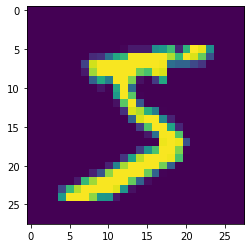

In [11]:
import matplotlib.pyplot as plt
# 칼라 이미지 /plt.imshow의 기본 설정은 칼라로 되어있다.
plt.imshow(x_train[0])
print("label: ", y_train[0])

label:  5


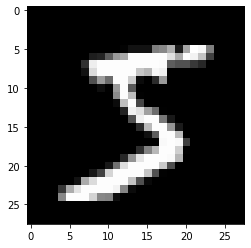

In [12]:
# 흑백 이미지
plt.imshow(x_train[0], cmap = "gray")
print("label: ", y_train[0])

## 데이터 값 출력

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

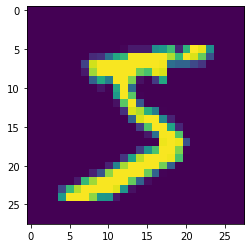

In [13]:
import numpy as np
np.set_printoptions(linewidth = 120) # 가독성 좋게 하기 위하여 printoption 설정

print(x_train[0])
plt.imshow(x_train[0])
print("label: ", y_train[0])

## 훈련(학습)
### model.fit(x_train, y_train)

### - epochs: 전체 데이터 세트를 학습 완료한 상태
### - batch_size: 한번의 배치마다 전체 데이터에서 일부를 불러오는 크기
### - literation: 한 epoch 당 필요한 배치 개수, 파라미터 업데이트 개수 (전체 데이터 세트 크기 / 배치 사이즈)

In [14]:
# 훈련(학습)
model.fit(x_train, y_train, epochs = 5) # epochs: 몇번을 학습할건지 작성

# <결과값>

# Epoch 5/5
# 1875/1875 [==============================] - 3s 2ms/step - loss: 0.2357 - accuracy: 0.9348

# epoch는 본인이 설정한 값만큼 학습
# 1875는 literation 
# 기본적으로 batch_size가 32라서, 데이터 개수(60,000) / batch_size(32) = 1875가 나온다.
# loss는 손실 함수, accuracy는 정확도

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5025 - accuracy: 0.8623
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3454 - accuracy: 0.9034
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2751 - accuracy: 0.9230
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2457 - accuracy: 0.9316
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2357 - accuracy: 0.9348


In [15]:
# batch_size 추가
model.fit(x_train, y_train, epochs = 5, batch_size = 64) # 1875 -> 938로 줄어든다.

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1703 - accuracy: 0.9507
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1677 - accuracy: 0.9515
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1674 - accuracy: 0.9520
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1630 - accuracy: 0.9523
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1611 - accuracy: 0.9539


## verbose 추가

In [17]:
# verbose = 0, slient모드(출력x) 
model.fit(x_train, y_train, epochs = 5, batch_size = 64, verbose = 0) # 진행표시가 안뜬다. / epoch, loss, accuracy도 안뜬다.

In [19]:
# verbose = 1, 진행 표시 
model.fit(x_train, y_train, epochs = 5, batch_size = 64, verbose = 1) # 진행 표시가 뜬다. / verbose를 입력안해도 기본 1로 설정

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1277 - accuracy: 0.9635
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1256 - accuracy: 0.9645
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1201 - accuracy: 0.9658
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1231 - accuracy: 0.9653
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1217 - accuracy: 0.9656


In [20]:
# verbose = 2, 진행 표시 없이 바로 나온다. 
model.fit(x_train, y_train, epochs = 5, batch_size = 64, verbose = 2) # 진행표시 없다. / epoch, loss, accuracy는 뜬다.

Epoch 1/5
938/938 - 2s - loss: 0.1174 - accuracy: 0.9661
Epoch 2/5
938/938 - 2s - loss: 0.1218 - accuracy: 0.9656
Epoch 3/5
938/938 - 2s - loss: 0.1197 - accuracy: 0.9661
Epoch 4/5
938/938 - 2s - loss: 0.1157 - accuracy: 0.9674
Epoch 5/5
938/938 - 2s - loss: 0.1151 - accuracy: 0.9677


In [21]:
# history로 입력을 받으면 나중에 그림으로 볼 수 있다.
history = model.fit(x_train, y_train, epochs = 5, batch_size = 64) 

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1100 - accuracy: 0.9686
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1103 - accuracy: 0.9684
Epoch 3/5
938/938 [==============================] - 2s 3ms/step - loss: 0.1141 - accuracy: 0.9678
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1185 - accuracy: 0.9670
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1140 - accuracy: 0.9686


Text(0, 0.5, 'accuarcy')

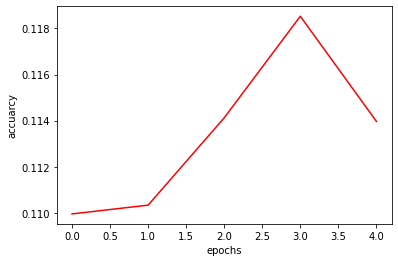

In [26]:
plt.plot(history.history["loss"], color = "red")
plt.xlabel("epochs")
plt.ylabel("accuarcy")